# Projekt Autoscout24

## Daten

In [1]:
#imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from wordcloud import WordCloud
import matplotlib.ticker as mticker
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
#Datensatz laden
df = pd.read_csv("autoscout24.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [4]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [5]:
df.describe()

,mileage,price,hp,year
count,4.640500e+04,4.640500e+04,46376.000000,46405.000000
mean,7.117786e+04,1.657234e+04,132.990987,2016.012951
std,6.262531e+04,1.930470e+04,75.449284,3.155214
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [6]:
df.shape

(46405, 9)

In [7]:
df.columns

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')

## Data Cleaning

In [8]:
#Nullwerte droppen
total_nan_values = df.isnull().sum().sum()
print(total_nan_values)
df = df.dropna()

354


In [9]:
# Dupilkate entfernen
df = df.drop_duplicates(keep='first')

In [10]:
## Ausreißer eliminieren

# Preis
min_price, max_price = df.price.quantile([0.001, 0.999])

# untere und obere Grenze für Preise
print(f'Minimale Preisgrenze: {min_price}')
print(f'Maximale Preisgrenze: {max_price}')

# Anzahl der Datensätze vor der Ausreißerentfernung
print(f'Anzahl der Datensätze vor der Ausreißerentfernung: {df.shape[0]}')

# Zähle die Anzahl der Ausreißer und gebe sie aus
outliers_count = df[df['price'] > max_price].value_counts().sum()
print(f'Anzahl der Ausreißer: {outliers_count}')

# Daten ohne Ausreißer auswählen
df = df[(df.price < max_price) & (df.price > min_price)]

# Anzahl der Datensätze nach der Ausreißerentfernung
print(f'Anzahl der Datensätze nach der Ausreißerentfernung: {df.shape[0]}')


# Kilometerstand (mileage)
min_mileage, max_mileage = df.mileage.quantile([0.001, 0.999])

# Drucke die untere und obere Grenze für den Kilometerstand
print(f'Minimaler Kilometerstand: {min_mileage}')
print(f'Maximaler Kilometerstand: {max_mileage}')

# Anzahl der Datensätze vor der Ausreißerentfernung
print(f'Anzahl der Datensätze vor der Ausreißerentfernung: {df.shape[0]}')

# Zähle die Anzahl der Ausreißer und gebe sie aus
mileage_outliers_count = df[df['mileage'] > max_mileage].value_counts().sum()
print(f'Anzahl der Kilometerstandsausreißer: {mileage_outliers_count}')

# Daten ohne Kilometerstandsausreißer auswählen
df = df[(df.mileage < max_mileage) & (df.mileage > min_mileage)]

# Anzahl der Datensätze nach der Ausreißerentfernung
print(f'Anzahl der Datensätze nach der Kilometerstandsausreißerentfernung: {df.shape[0]}')


Minimale Preisgrenze: 2199.946
Maximale Preisgrenze: 218002.60000000708
Anzahl der Datensätze vor der Ausreißerentfernung: 43947
Anzahl der Ausreißer: 44
Anzahl der Datensätze nach der Ausreißerentfernung: 43859
Minimaler Kilometerstand: 0.0
Maximaler Kilometerstand: 400000.0
Anzahl der Datensätze vor der Ausreißerentfernung: 43859
Anzahl der Kilometerstandsausreißer: 43
Anzahl der Datensätze nach der Kilometerstandsausreißerentfernung: 43751


In [11]:
df['fuel'] = df['fuel'].replace('Diesel', 0)
df['fuel'] = df['fuel'].replace('Gasoline', 1)
df['fuel'] = df['fuel'].replace(['Electric/Gasoline', 'Electric/Diesel', 'Electric'],  2)
df['fuel'] = df['fuel'].replace(['CNG', 'LPG', 'Others', '-/- (Fuel)', 'Ethanol', 'Hydrogen'], 3)

In [12]:
df['fuel'] = df['fuel'].replace(0, 'Diesel')
df['fuel'] = df['fuel'].replace(1, 'Benzin')
df['fuel'] = df['fuel'].replace(2, 'Electric')
df['fuel'] = df['fuel'].replace(3, 'Others')
#df = df.reset_index(drop=True)

## Analyse

In [13]:
#1 Wieviele Autos wurden verkauft? Uber welchen Zeitraum? 

anzahl_autos = len(df)
print("Gesamtanzahl der Autos:", anzahl_autos)

min_jahr = df['year'].min()
max_jahr = df['year'].max()

print("Zeitraum: {} bis {}".format(min_jahr, max_jahr))

Gesamtanzahl der Autos: 43751
Zeitraum: 2011 bis 2021


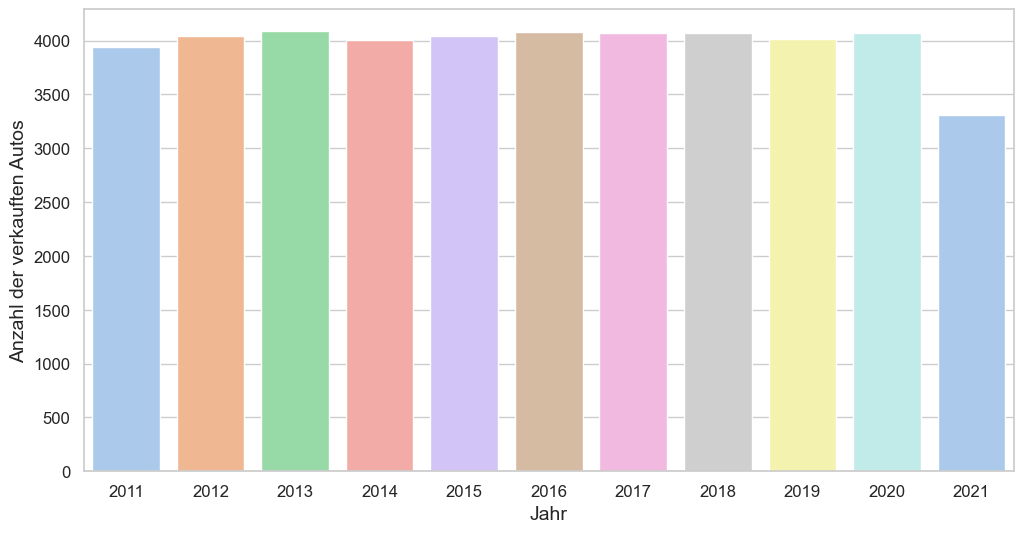

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Ihr DataFrame heißt 'autos' und die Verkaufszeit ist in der Spalte 'year'
# Wir nehmen an, dass jedes Auto im Datensatz einen Verkaufszeitpunkt hat.

# Gruppieren Sie nach Jahr und zählen Sie die Anzahl der Autos
verkaufszahlen_pro_jahr = df.groupby('year').size()

# Stil und Farbpalette festlegen
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")

# Plotten Sie die Verkaufszahlen über den Zeitraum
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=verkaufszahlen_pro_jahr.index, y=verkaufszahlen_pro_jahr.values, palette=palette)
bar_plot.set_xlabel('Jahr', fontsize=14)
bar_plot.set_ylabel('Anzahl der verkauften Autos', fontsize=14)
bar_plot.tick_params(axis='both', labelsize=12)

plt.show()


In [15]:
#2 Welche Marken sind erfasst?

marken = df['make'].unique()
print("Erfasste Marken:", marken)
print(len(marken))


Erfasste Marken: ['BMW' 'Volkswagen' 'SEAT' 'Renault' 'Peugeot' 'Toyota' 'Opel' 'Mazda'
 'Ford' 'Chevrolet' 'Audi' 'Fiat' 'Kia' 'Dacia' 'MINI' 'Mercedes-Benz'
 'Hyundai' 'Skoda' 'Citroen' 'Infiniti' 'Suzuki' 'SsangYong' 'smart'
 'Cupra' 'Volvo' 'Jaguar' 'Porsche' 'Nissan' 'Honda' 'Mitsubishi' 'Lexus'
 'Jeep' 'Maserati' 'Bentley' 'Land' 'Alfa' 'Subaru' 'Dodge' 'Microcar'
 'Lada' 'Tesla' 'Chrysler' 'McLaren' 'Aston' 'Lancia' 'Abarth' 'DS'
 'Daihatsu' 'Ligier' 'Aixam' 'Zhidou' 'Morgan' 'RAM' 'Ferrari' 'Alpina'
 'Polestar' 'Piaggio' 'FISKER' 'Lamborghini' 'Rolls-Royce' 'Cadillac'
 'Iveco' 'Isuzu' 'Corvette' 'Baic' 'DFSK' 'Estrima' 'Alpine']
68


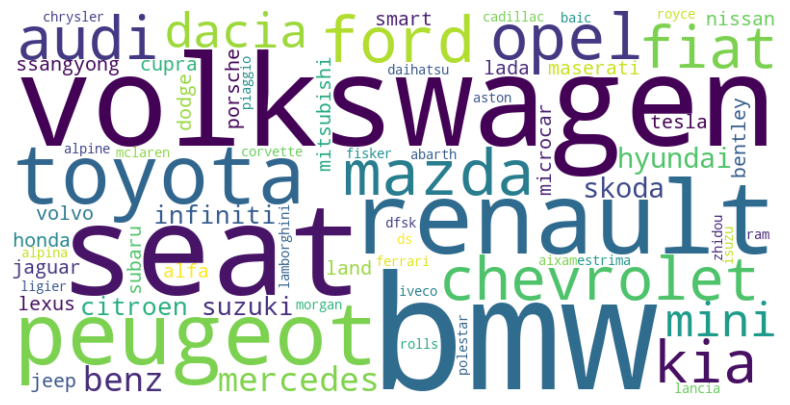

In [16]:

marken_text = ' '.join(df['make'].str.lower().drop_duplicates())
# Erstellen Sie die Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(marken_text)

# Zeigen Sie die Wordcloud an
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

C:\Users\ruedi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


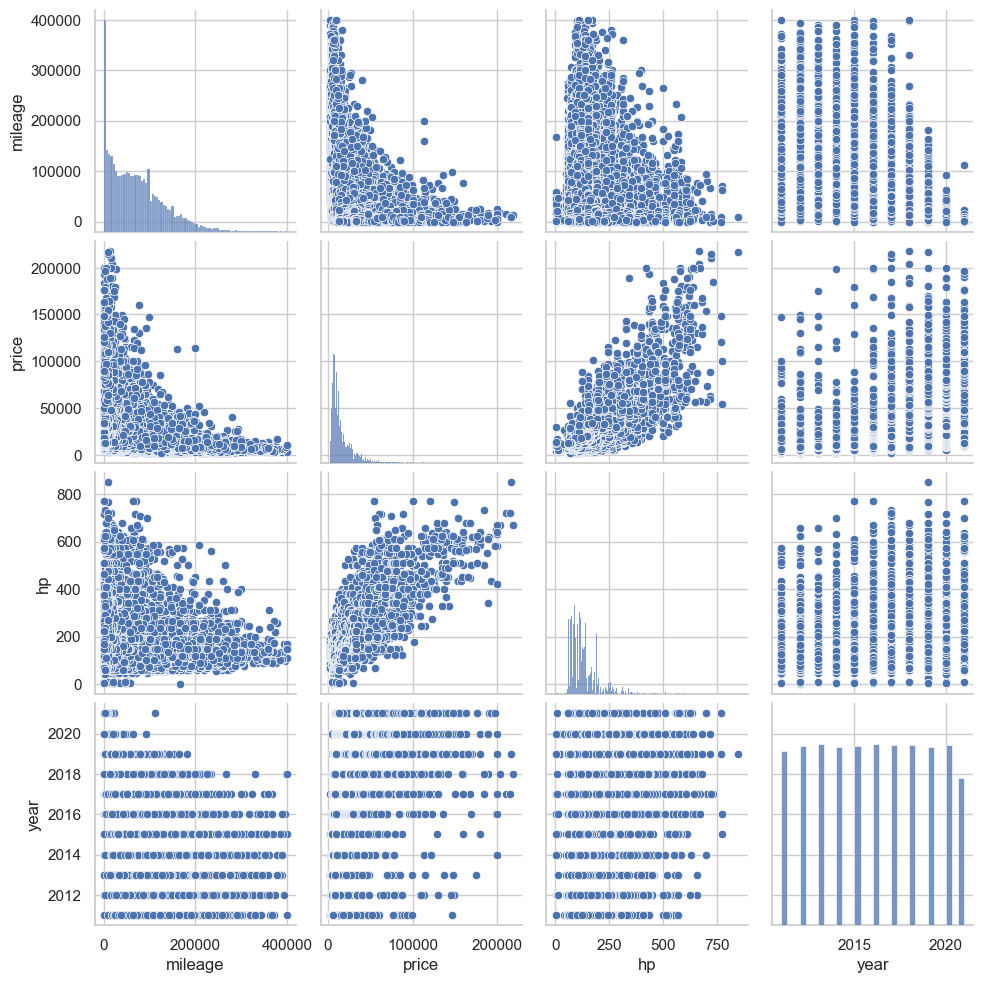

In [17]:
#3 Existieren Korrelationen zwischen den (numerischen) Features? (Scatterplots)

num_features = df[['mileage', 'price', 'hp', 'year']]

# Paarplot-Matrix
scatterplot_matrix = sns.pairplot(num_features)
plt.show()

In [18]:
korrelationsmatrix = num_features.corr()
print(korrelationsmatrix)

          mileage     price        hp      year
mileage  1.000000 -0.362387 -0.016412 -0.681391
price   -0.362387  1.000000  0.801894  0.495876
hp      -0.016412  0.801894  1.000000  0.181363
year    -0.681391  0.495876  0.181363  1.000000


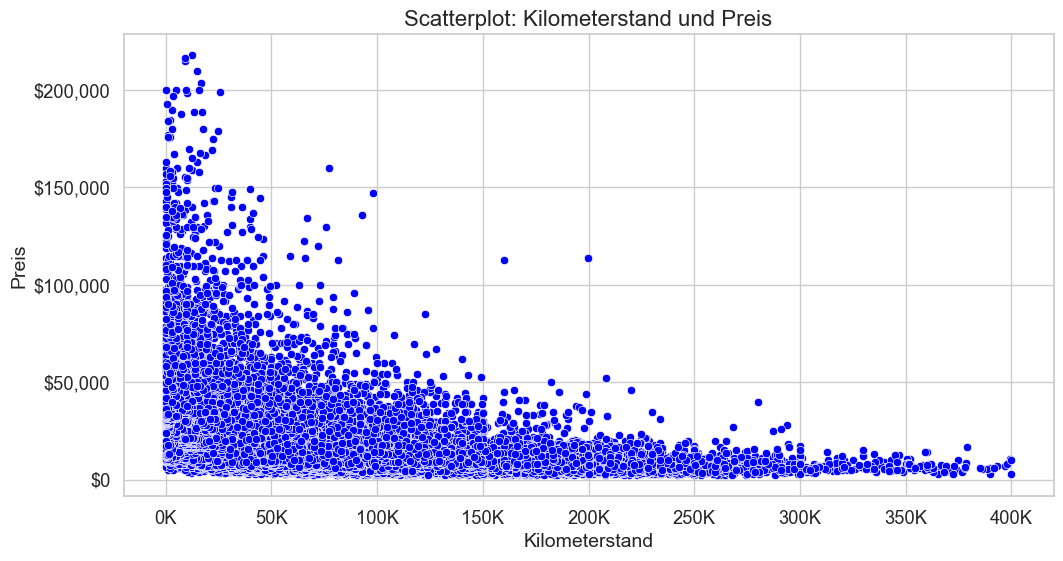

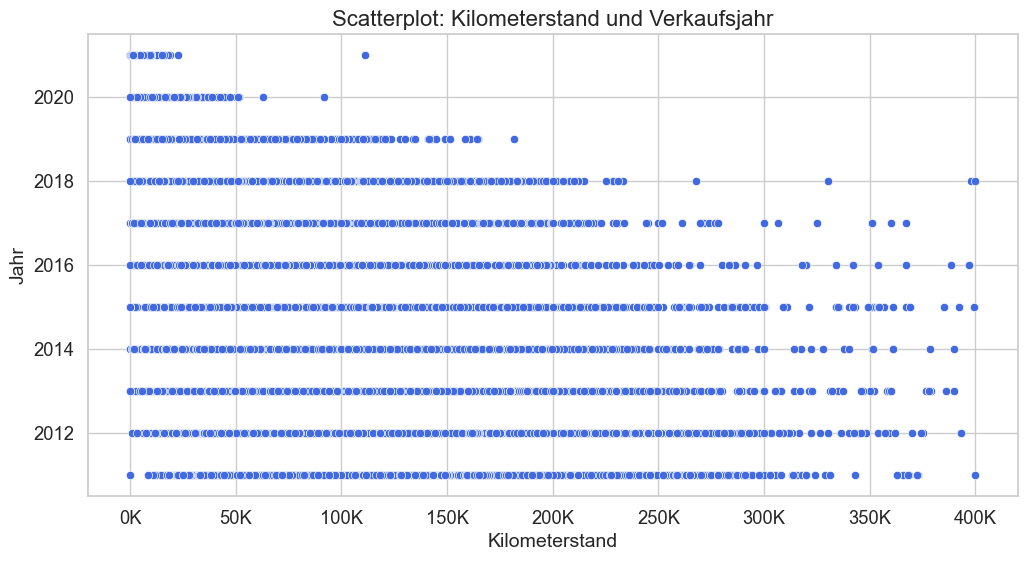

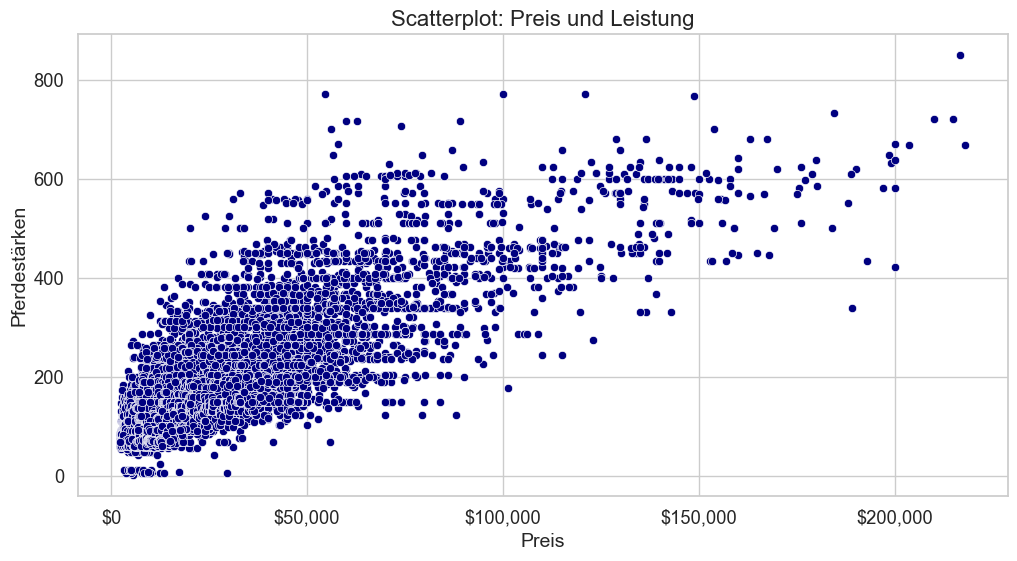

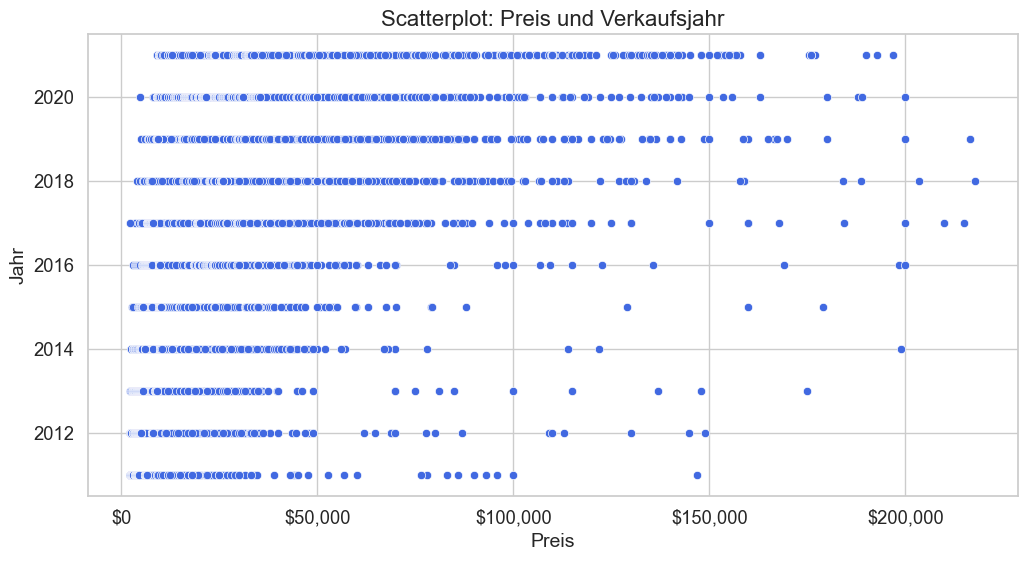

In [19]:
# Einstellungen für die Scatterplots
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Funktion zur Formatierung der Achsenbeschriftungen in Tausenden und mit Abkürzung
def format_thousands(x, pos):
    return f'{x/1000:.0f}K'

# Scatterplot: mileage vs. price
plt.figure(figsize=(12, 6))
scatter_mileage_price = sns.scatterplot(x='mileage', y='price', data=df, color='blue')
scatter_mileage_price.set_title('Scatterplot: Kilometerstand und Preis', fontsize=16)
scatter_mileage_price.set_xlabel('Kilometerstand', fontsize=14)
scatter_mileage_price.set_ylabel('Preis', fontsize=14)
scatter_mileage_price.xaxis.set_major_formatter(mticker.FuncFormatter(format_thousands))
scatter_mileage_price.yaxis.set_major_formatter('${x:,.0f}')
plt.show()

# Scatterplot: mileage vs. year
plt.figure(figsize=(12, 6))
scatter_mileage_year = sns.scatterplot(x='mileage', y='year', data=df, color='royalblue')
scatter_mileage_year.set_title('Scatterplot: Kilometerstand und Verkaufsjahr', fontsize=16)
scatter_mileage_year.set_xlabel('Kilometerstand', fontsize=14)
scatter_mileage_year.set_ylabel('Jahr', fontsize=14)
scatter_mileage_year.xaxis.set_major_formatter(mticker.FuncFormatter(format_thousands))
plt.show()

# Scatterplot: price vs. hp
plt.figure(figsize=(12, 6))
scatter_price_hp = sns.scatterplot(x='price', y='hp', data=df, color='navy')
scatter_price_hp.set_title('Scatterplot: Preis und Leistung', fontsize=16)
scatter_price_hp.set_xlabel('Preis', fontsize=14)
scatter_price_hp.set_ylabel('Pferdestärken', fontsize=14)
scatter_price_hp.xaxis.set_major_formatter('${x:,.0f}')
plt.show()

# Scatterplot: price vs. year
plt.figure(figsize=(12, 6))
scatter_price_year = sns.scatterplot(x='price', y='year', data=df, color='royalblue')
scatter_price_year.set_title('Scatterplot: Preis und Verkaufsjahr', fontsize=16)
scatter_price_year.set_xlabel('Preis', fontsize=14)
scatter_price_year.set_ylabel('Jahr', fontsize=14)
scatter_price_year.xaxis.set_major_formatter('${x:,.0f}')
plt.show()




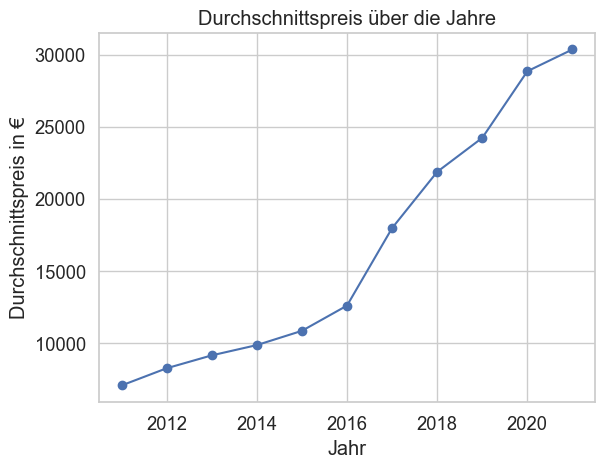

In [20]:
#4 Gibt es Veränderungen über die Jahre?

durchschnittspreise_nach_jahr = df.groupby('year')['price'].mean()

# Plotten Sie die Durchschnittspreise über die Jahre
plt.plot(durchschnittspreise_nach_jahr.index, durchschnittspreise_nach_jahr.values, marker='o')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittspreis in €')
plt.title('Durchschnittspreis über die Jahre')
plt.show()

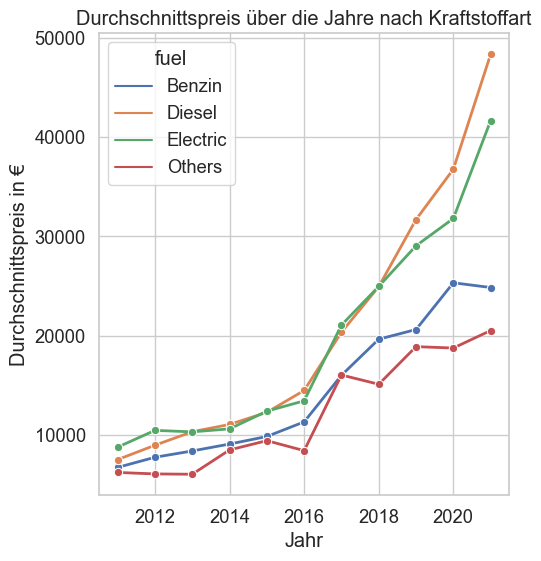

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gruppieren Sie nach Jahr und berechnen Sie den Durchschnittspreis
durchschnittspreise_nach_jahr = df.groupby('year')['price'].mean().reset_index()

# Gruppieren Sie nach Jahr, Kraftstoffart und berechnen Sie den Durchschnittspreis
durchschnittspreise_nach_jahr_fuel = df.groupby(['year', 'fuel'])['price'].mean().reset_index()

# Einstellungen für die Visualisierung
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Erstellen eines Schaubilds mit drei Subplots für die Durchschnittspreise über die Jahre
plt.figure(figsize=(18, 6))

# Subplot 2: Durchschnittspreise über die Jahre nach Kraftstoffart
plt.subplot(1, 3, 2)
sns.lineplot(x='year', y='price', hue='fuel', data=durchschnittspreise_nach_jahr_fuel, marker='o', linewidth=2)
plt.xlabel('Jahr')
plt.ylabel('Durchschnittspreis in €')
plt.title('Durchschnittspreis über die Jahre nach Kraftstoffart')

plt.show()


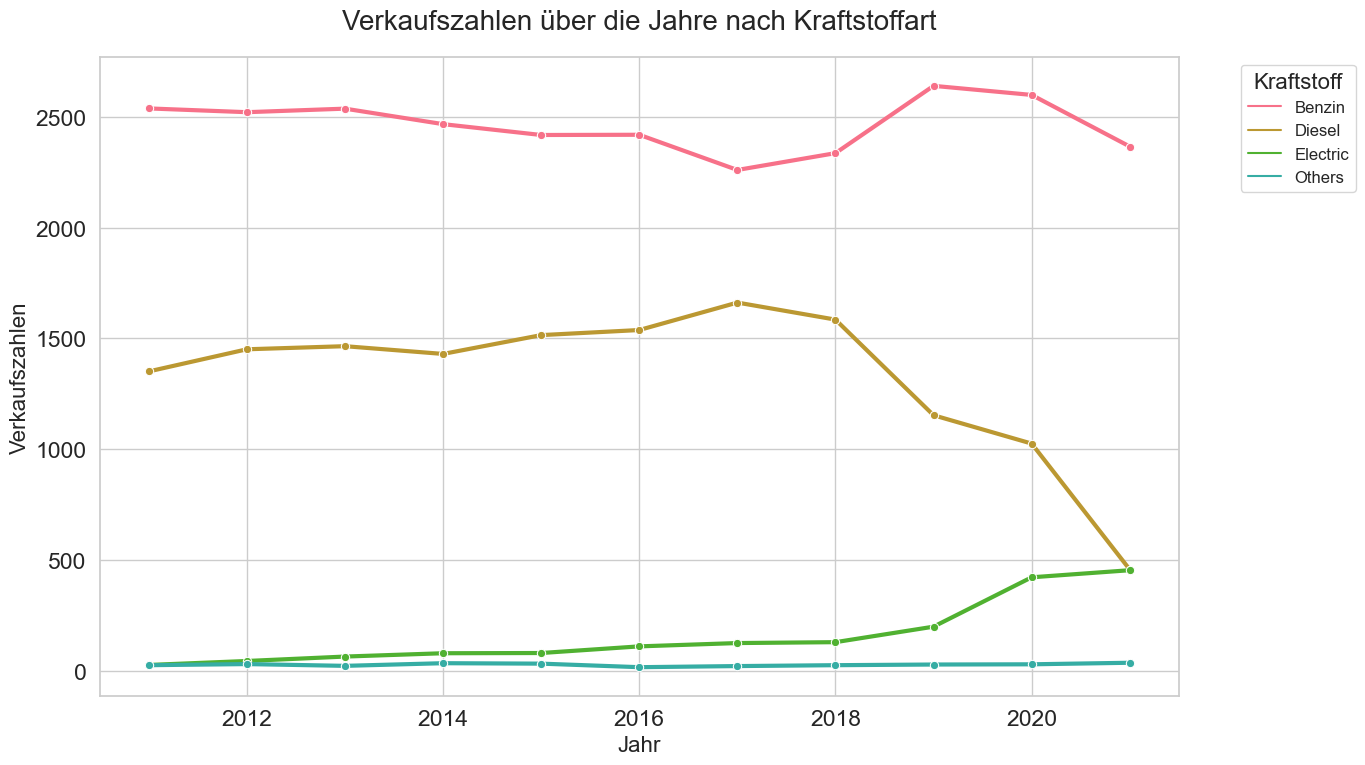

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Annahme: Ihr DataFrame heißt 'df' und enthält die Variable 'fuel' und 'year'
# Fügen Sie die folgenden Zeilen Ihrem Code hinzu:

# Gruppieren nach Jahr und Kraftstoffart und zählen die Anzahl der Verkäufe
sales_by_year_fuel = df.groupby(['year', 'fuel']).size().reset_index(name='sales')

# Einstellungen für die Visualisierung
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_palette("husl")

# Erstellen eines Liniendiagramms für die Verkaufszahlen über die Jahre nach Kraftstoffart
plt.figure(figsize=(14, 8))
lineplot_sales_year_fuel = sns.lineplot(x='year', y='sales', hue='fuel', data=sales_by_year_fuel, marker='o', linewidth=3)
lineplot_sales_year_fuel.set_title('Verkaufszahlen über die Jahre nach Kraftstoffart', fontsize=20, pad=20)
lineplot_sales_year_fuel.set_xlabel('Jahr', fontsize=16)
lineplot_sales_year_fuel.set_ylabel('Verkaufszahlen', fontsize=16)
lineplot_sales_year_fuel.legend(title='Kraftstoff', title_fontsize='16', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

# Hintergrundstil ändern
sns.set_style("darkgrid")

plt.tight_layout()
plt.show()

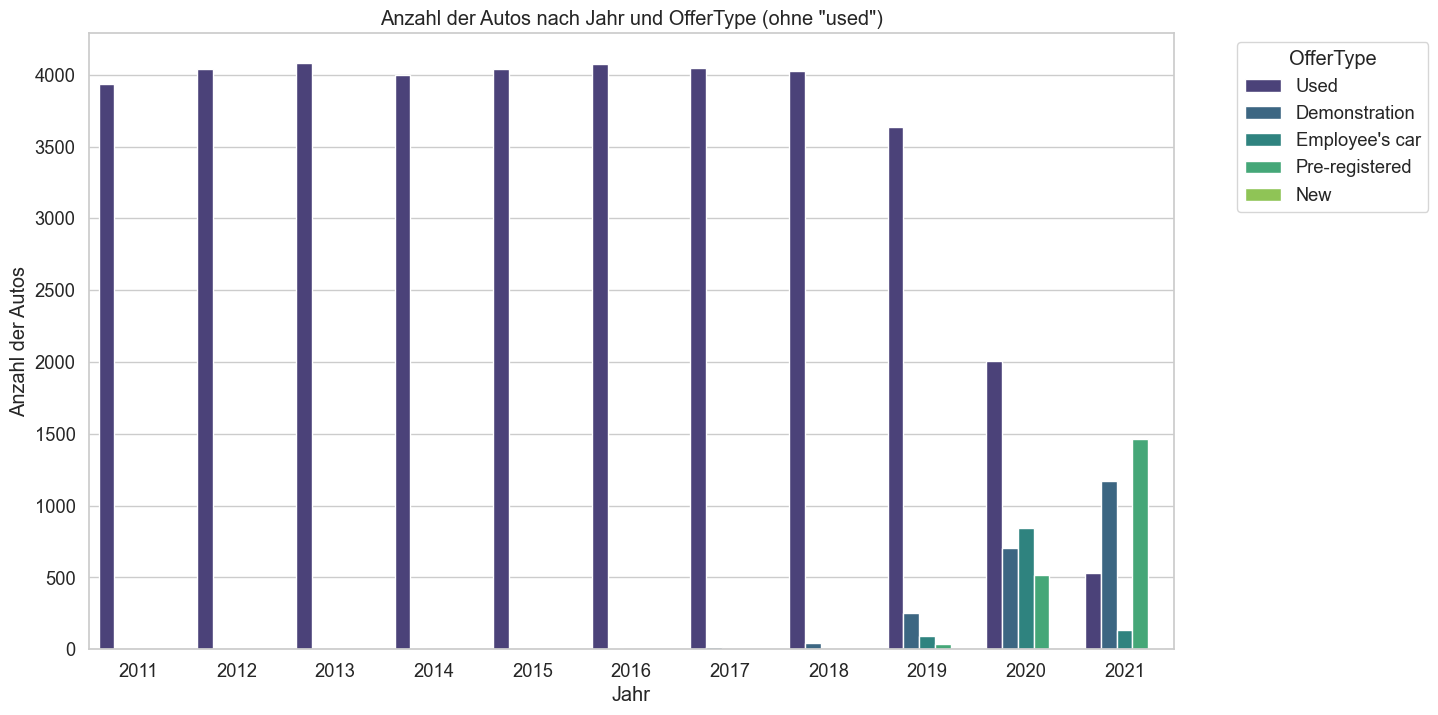

In [23]:
# Einstellungen für die Visualisierung
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Erstellen eines Balkendiagramms für die Anzahl der Autos nach Jahr und OfferType (ohne 'used')
plt.figure(figsize=(14, 8))
sns.countplot(x='year', hue='offerType', data=df, palette='viridis')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Autos')
plt.title('Anzahl der Autos nach Jahr und OfferType (ohne "used")')
plt.legend(title='OfferType', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

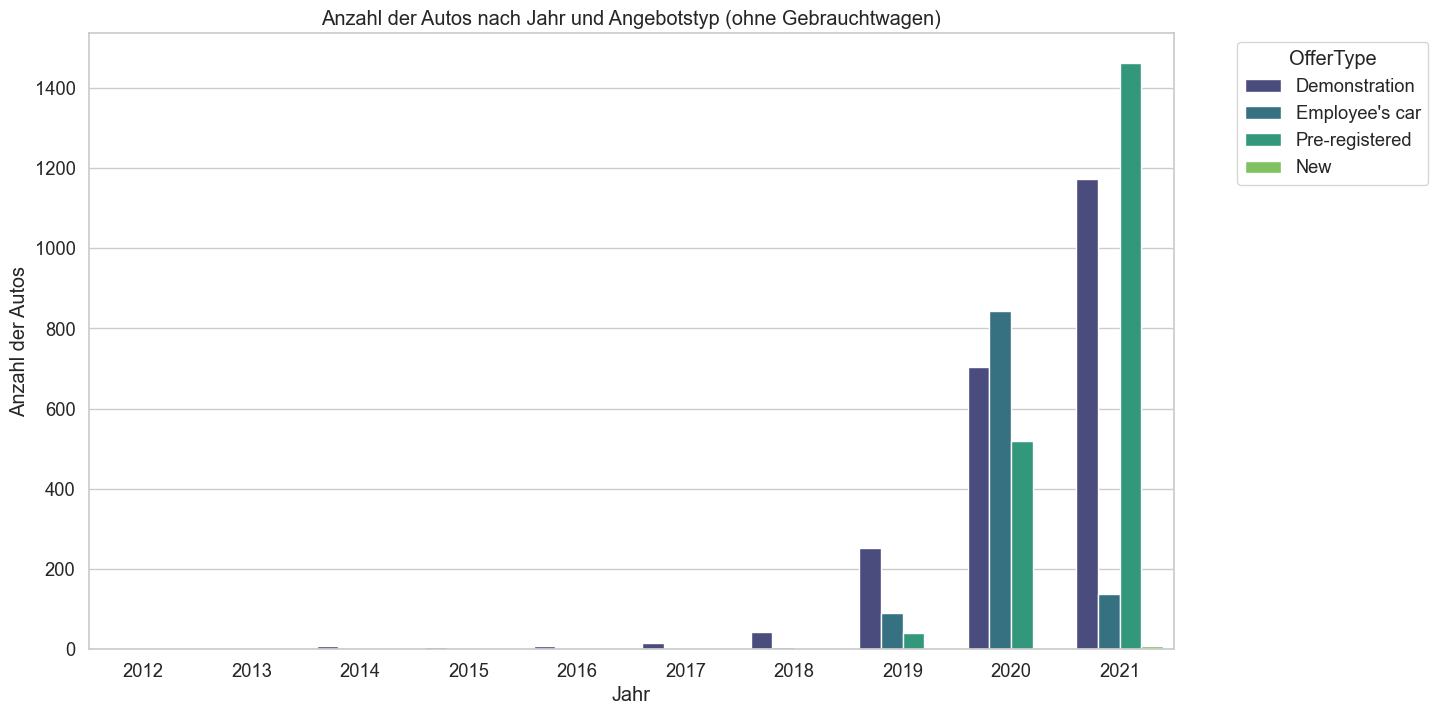

In [24]:
# Einstellungen für die Visualisierung
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Filtern Sie Daten für den OfferType 'Used' heraus
df_filtered = df[df['offerType'] != 'Used']

# Erstellen eines Balkendiagramms für die Anzahl der Autos nach Jahr und OfferType (ohne 'used')
plt.figure(figsize=(14, 8))
sns.countplot(x='year', hue='offerType', data=df_filtered, palette='viridis')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Autos')
plt.title('Anzahl der Autos nach Jahr und Angebotstyp (ohne Gebrauchtwagen)')
plt.legend(title='OfferType', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


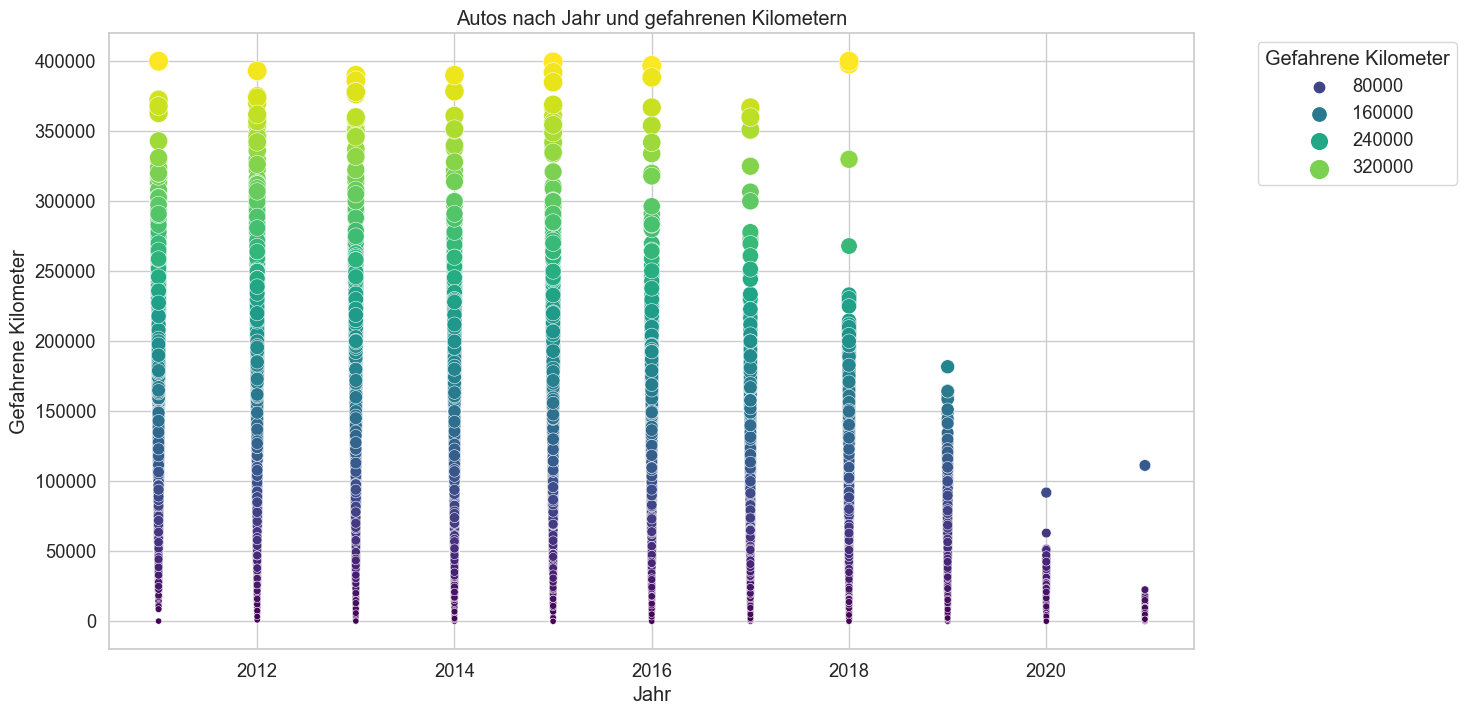

In [25]:
# Einstellungen für die Visualisierung
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Erstellen eines Scatterplots für die Autos nach Jahr und gefahrenen Kilometern
plt.figure(figsize=(14, 8))
scatter_mileage_year = sns.scatterplot(x='year', y='mileage', data=df, hue='mileage', palette='viridis', size='mileage', sizes=(20, 200))
plt.xlabel('Jahr')
plt.ylabel('Gefahrene Kilometer')
plt.title('Autos nach Jahr und gefahrenen Kilometern')
plt.legend(title='Gefahrene Kilometer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Machine Learning

In [26]:
top_5_hersteller = df['make'].value_counts().head(5).index.tolist()
print("Top 5 Hersteller:", top_5_hersteller)

Top 5 Hersteller: ['Volkswagen', 'Opel', 'Ford', 'Skoda', 'Renault']


In [27]:
df = df[df['make'].isin(top_5_hersteller)]

durchschnittspreise_pro_hersteller = df.groupby('make')['price'].mean()
print("Durchschnittspreise pro Hersteller:")
print(durchschnittspreise_pro_hersteller)

Durchschnittspreise pro Hersteller:
make
Ford          13753.184932
Opel          10366.545057
Renault       11298.904115
Skoda         13671.972131
Volkswagen    15986.184708
Name: price, dtype: float64


In [28]:
sortierte_durchschnittspreise = durchschnittspreise_pro_hersteller.sort_values(ascending=False)
print("Sortierte Durchschnittspreise pro Hersteller:")
print(sortierte_durchschnittspreise)

Sortierte Durchschnittspreise pro Hersteller:
make
Volkswagen    15986.184708
Ford          13753.184932
Skoda         13671.972131
Renault       11298.904115
Opel          10366.545057
Name: price, dtype: float64


### Modelle

In [29]:
# Features and target variable selection
features = df[['mileage','hp']]
target = df['price']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model initialization
linear_model = LinearRegression()
forest_model = RandomForestRegressor()
svr_model = SVR()

# Model training
linear_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)

# Feature Scaling for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model.fit(X_train_scaled, y_train)

# Model evaluation
linear_predict_test = linear_model.predict(X_test)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predict_test))
linear_r2 = r2_score(y_test, linear_predict_test)

forest_predict_test = forest_model.predict(X_test)
forest_rmse = np.sqrt(mean_squared_error(y_test, forest_predict_test))
forest_r2 = r2_score(y_test, forest_predict_test)

svr_predict_test = svr_model.predict(X_test_scaled)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_predict_test))
svr_r2 = r2_score(y_test, svr_predict_test)

# Display the results
print("Linear Regression RMSE:", round(linear_rmse, 2))
print("Linear Regression R²:", round(linear_r2, 2))

print("Random Forest RMSE:", round(forest_rmse, 2))
print("Random Forest R²:", round(forest_r2, 2))

print("SVR RMSE:", round(svr_rmse, 2))
print("SVR R²:", round(svr_r2, 2))


Linear Regression RMSE: 5315.17
Linear Regression R²: 0.68
Random Forest RMSE: 4178.35
Random Forest R²: 0.8
SVR RMSE: 8813.22
SVR R²: 0.11
